# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [3]:
library('tidyverse')
volcano = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")
volcano %>% print

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [11]:
most_eruptions = volcano %>% group_by(volcano_name) %>% 
                             count(volcano_name) %>% 
                             arrange(desc(n)) %>%
                             head(1)
most_eruptions

volcano_name,n
<chr>,<int>
Etna,241


## The volcano with the most erruptions is Etna.

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [20]:
etna_recent = volcano %>% filter(volcano_name == "Etna") %>% 
                          arrange(desc(start_year)) %>% 
                          select(volcano_name, start_year) %>% 
                          head(1)
etna_recent

volcano_name,start_year
<chr>,<dbl>
Etna,2013


## Etna's most recent eruption was in 2013.

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

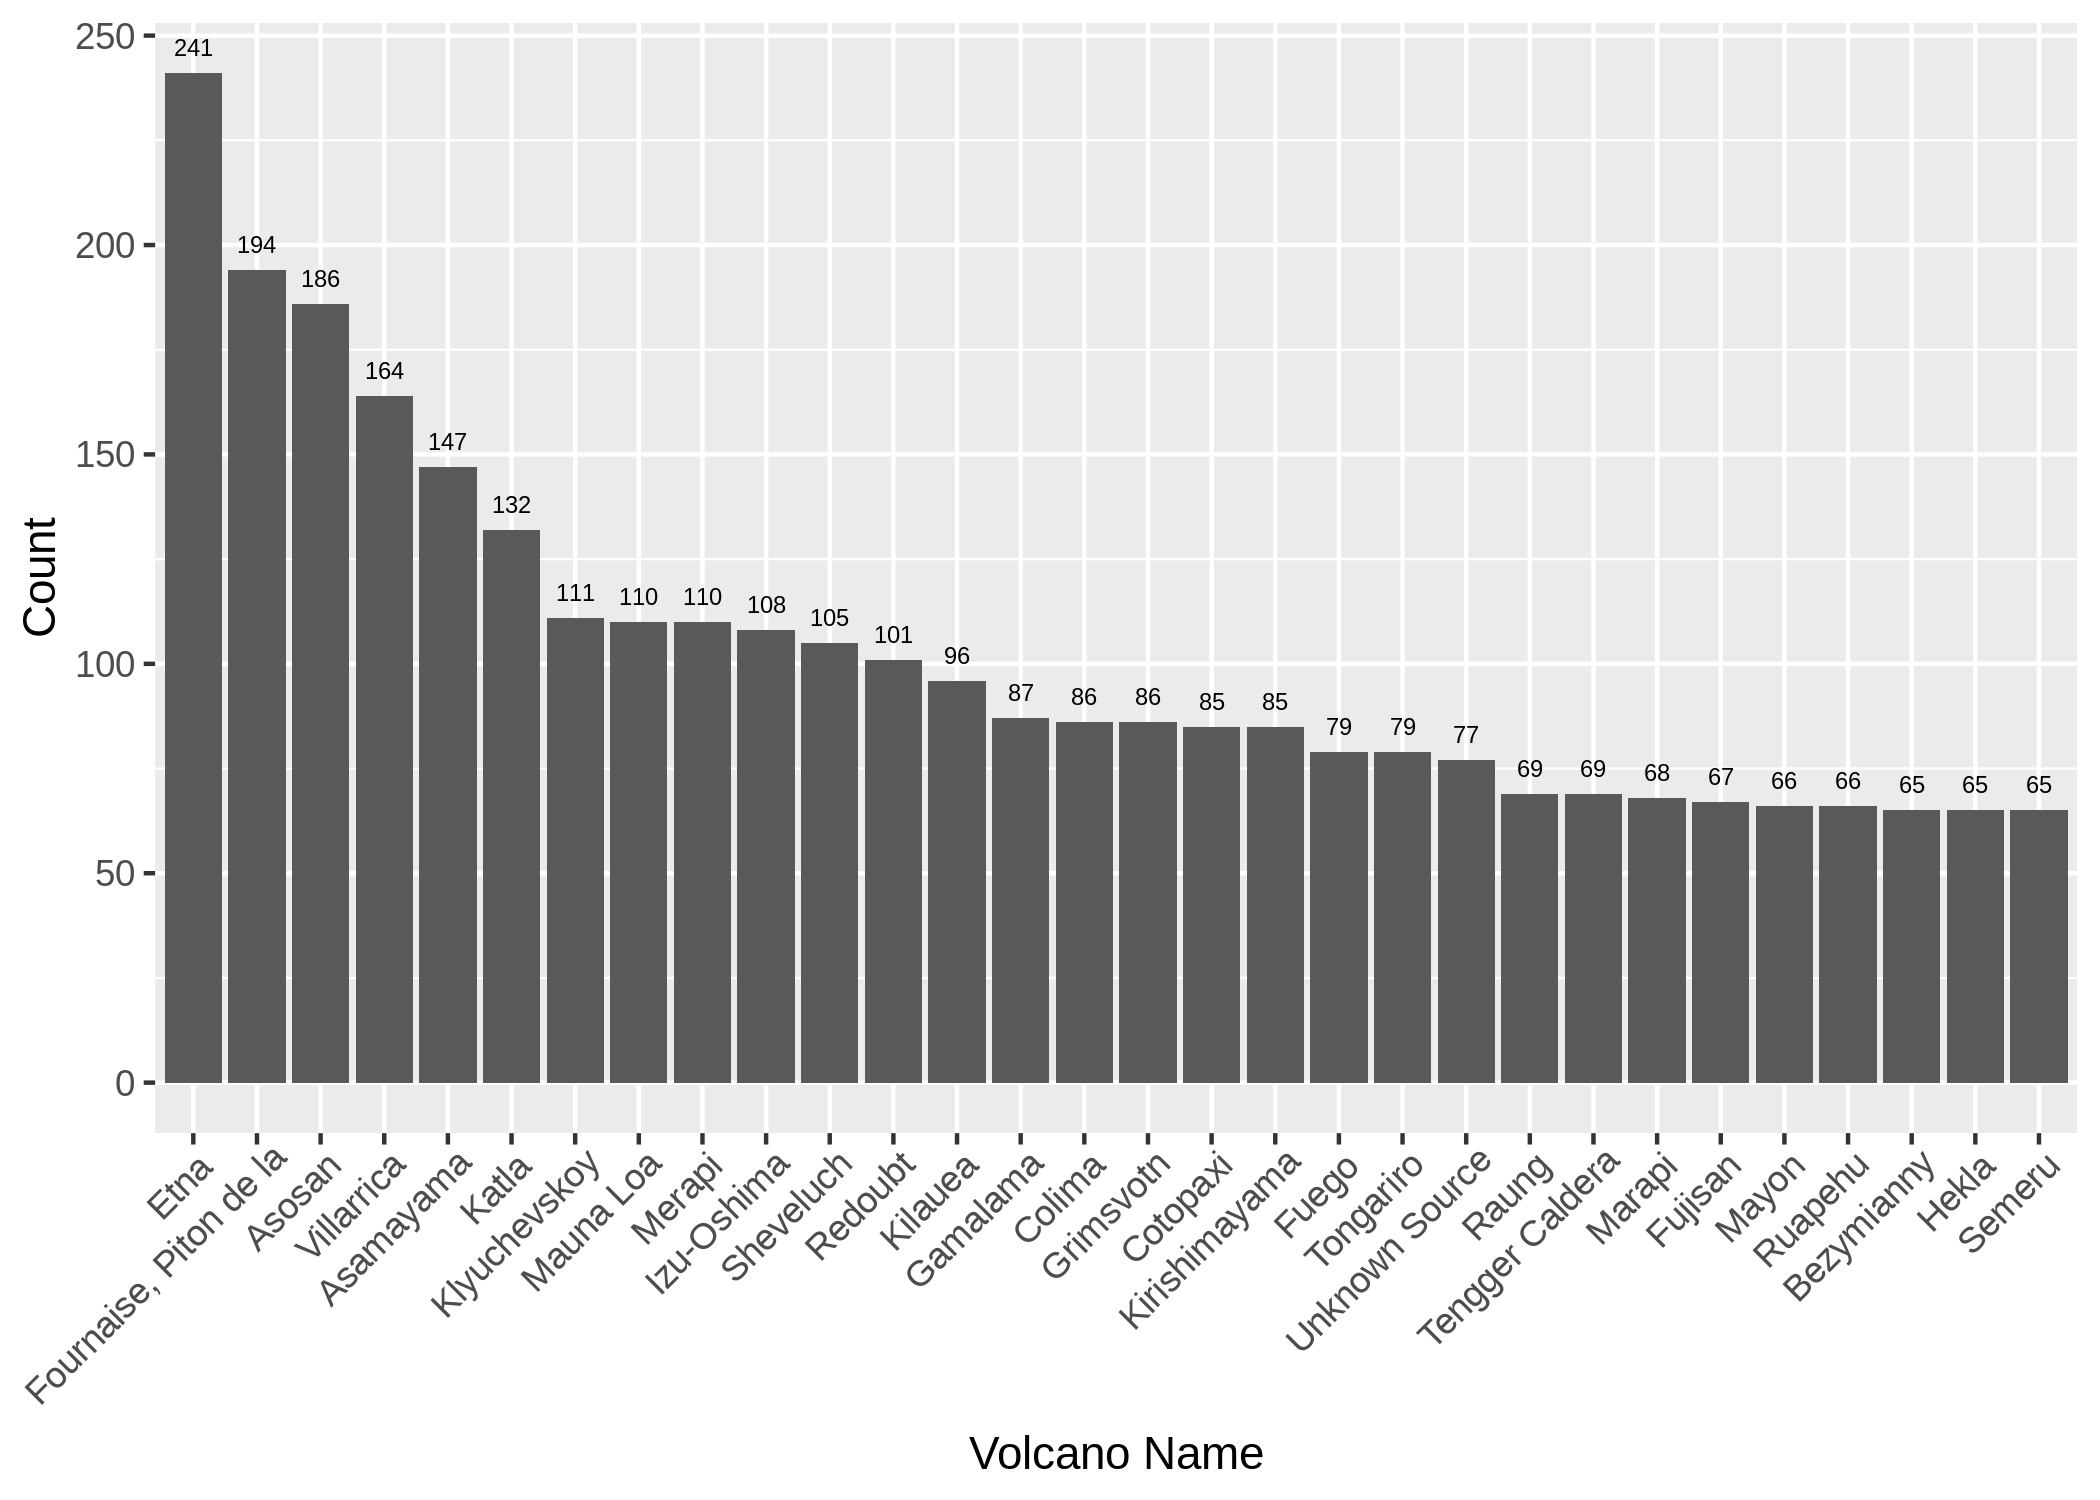

In [67]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)

vol_lump = volcano %>% 
           mutate(vol_lump = volcano_name %>% fct_infreq() %>% fct_lump(n = 30)) %>% 
           filter(vol_lump != "Other")

p = ggplot(vol_lump, aes(x = vol_lump)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle = 45, hjust = 0.95)) +
    geom_text(stat='count', aes(label=..count..), vjust = -1, size = 2) +
    xlab("Volcano Name") + ylab("Count")

p

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

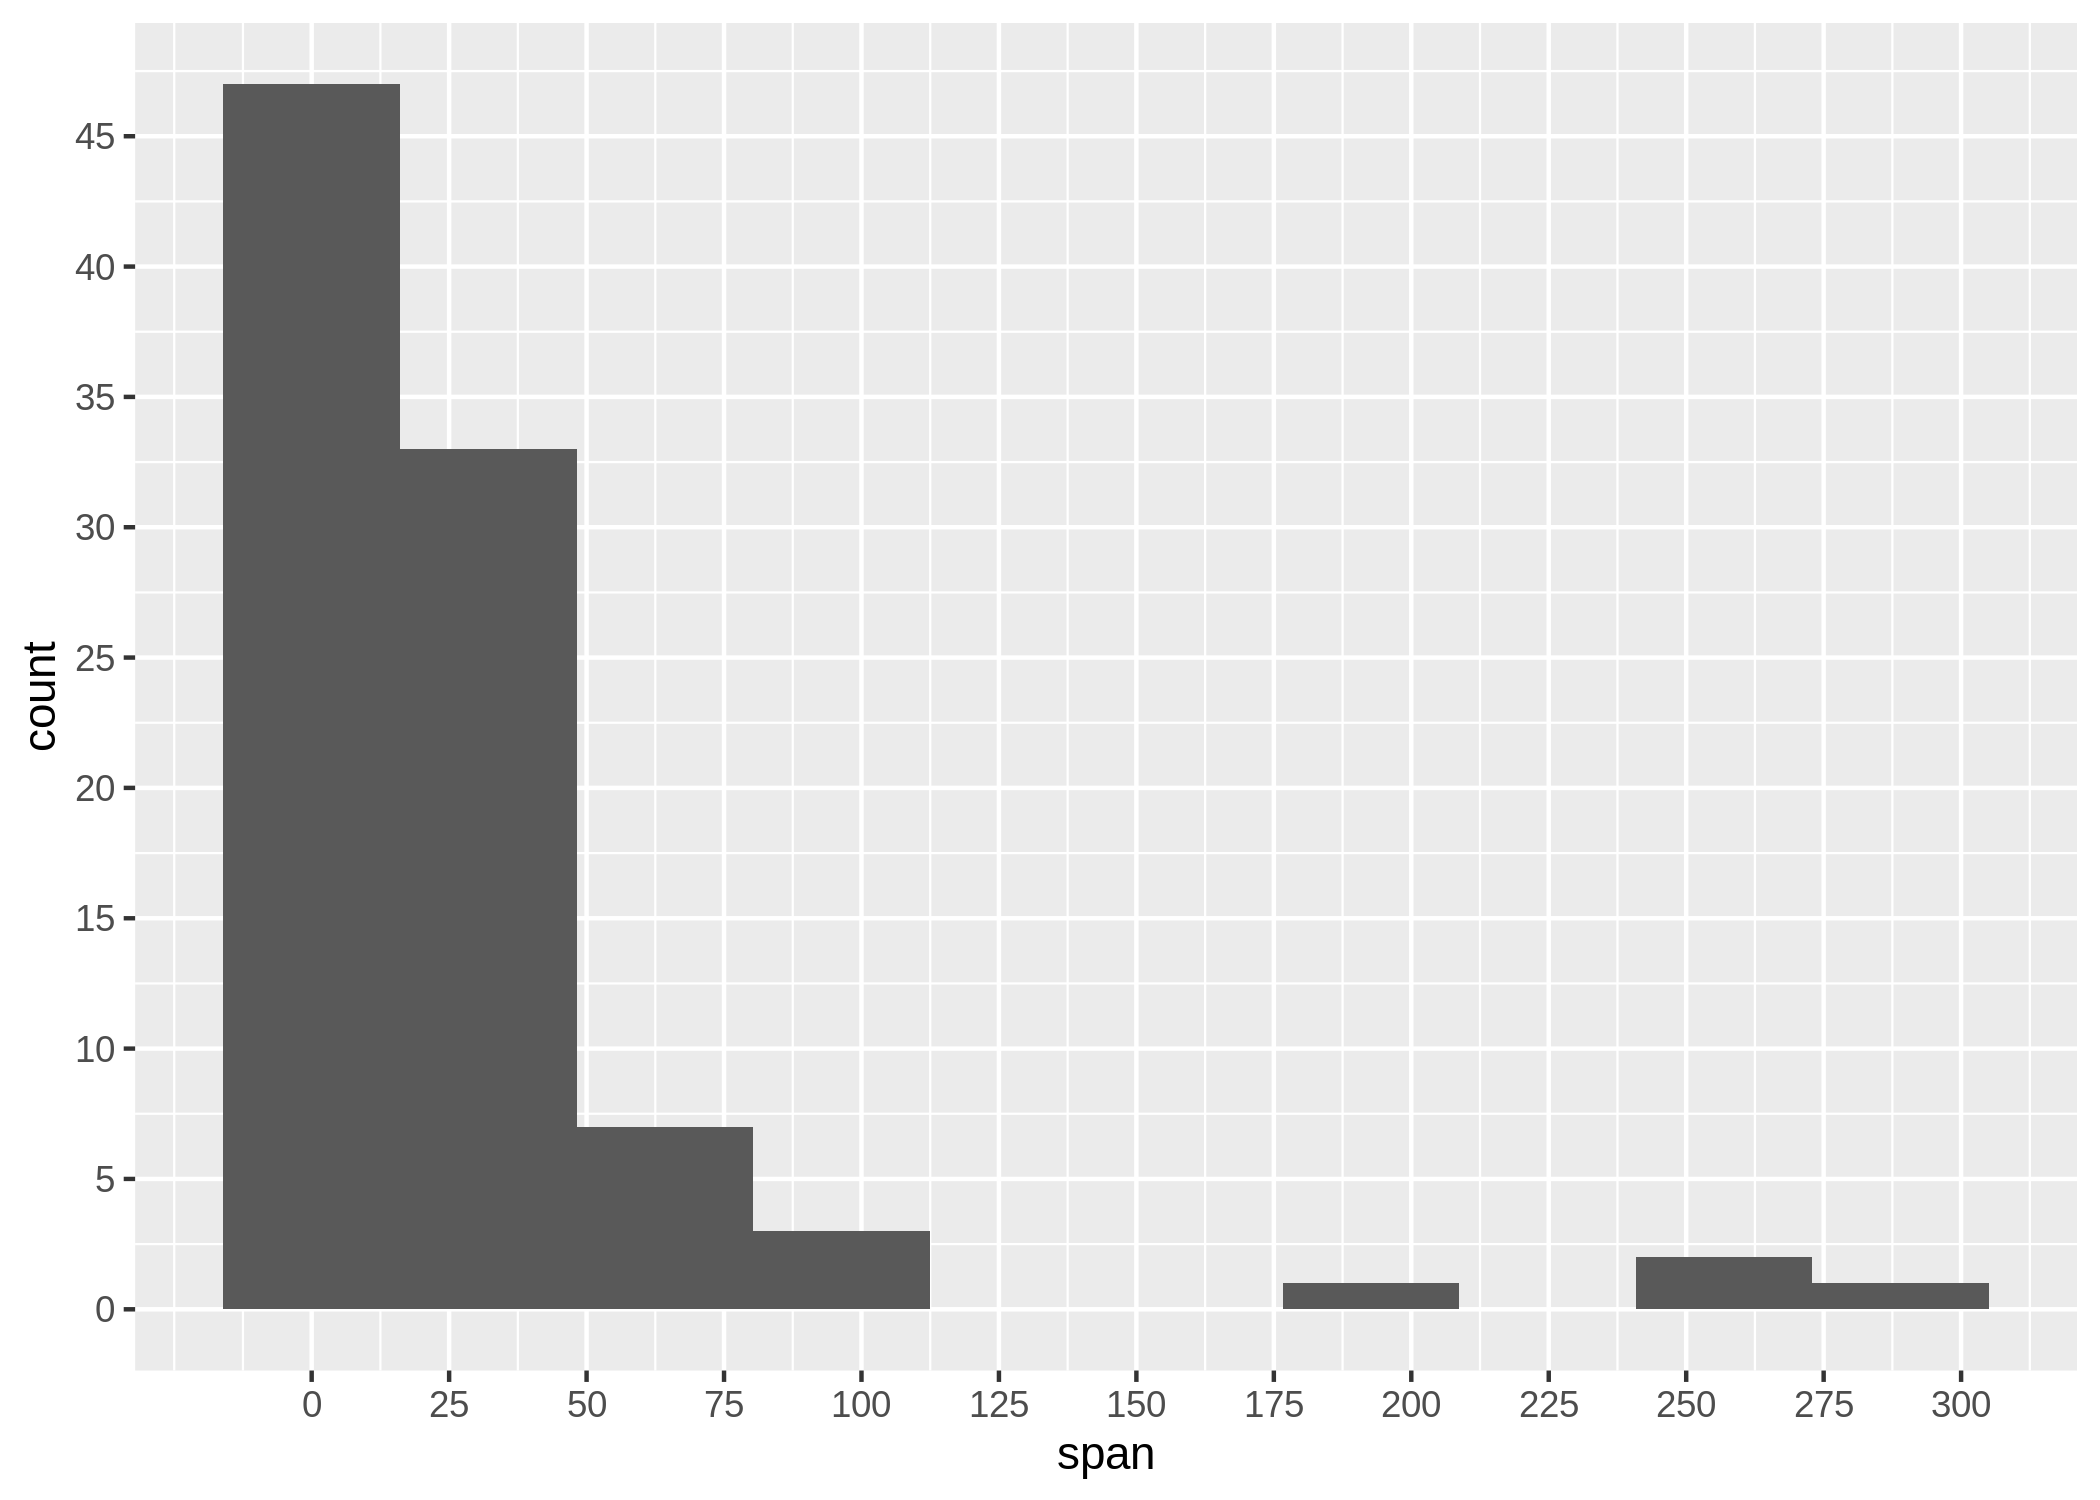

In [81]:
vol_erup = volcano %>%
           mutate(span = end_year - start_year) %>%
           filter(span > 9) %>%
           arrange(desc(span))

p = ggplot(vol_erup, aes(x = span)) +
    geom_histogram(bins = 10) +
    scale_x_continuous(breaks=seq(0,300,25)) +
    scale_y_continuous(breaks=seq(0,50,5))

p

In [84]:
vol_erup %>% head(1) %>% select(volcano_name, span)

volcano_name,span
<chr>,<dbl>
Stromboli,299


## Stromboli has the longest eruption span at 299 years.